In [1]:
import numpy as np

In [2]:
# Configure the data generation process and train the autoencoder

def gen(n = 400):
    
    x = np.zeros((n, 4))
    
    for i in range(n):
        
        if np.random.uniform() < 0.5:
            x[i, 0] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        if np.random.uniform() < 0.5:
            x[i, 1] = 1.0 + np.random.normal(loc = 0.0, scale = 0.2)
            
        x[i, 2] = np.random.normal(loc = 0.0, scale = 0.5)
        
        x[i, 3] = x[i, 0] + np.random.normal(loc = 0.0, scale = 0.05)
        
    return x

x = gen()

In [3]:
x = np.load('./x.npy/x.npy')

In [4]:
from Model import *
model = Model.Initialize('autoencoder', x, pretrained_path='./Models/best.pt')

Loading the pretrained model...


In [5]:
from sklearn.cluster import KMeans
num_clusters = 4

rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(rep)

In [6]:
from eldr.plotter.myplot import *

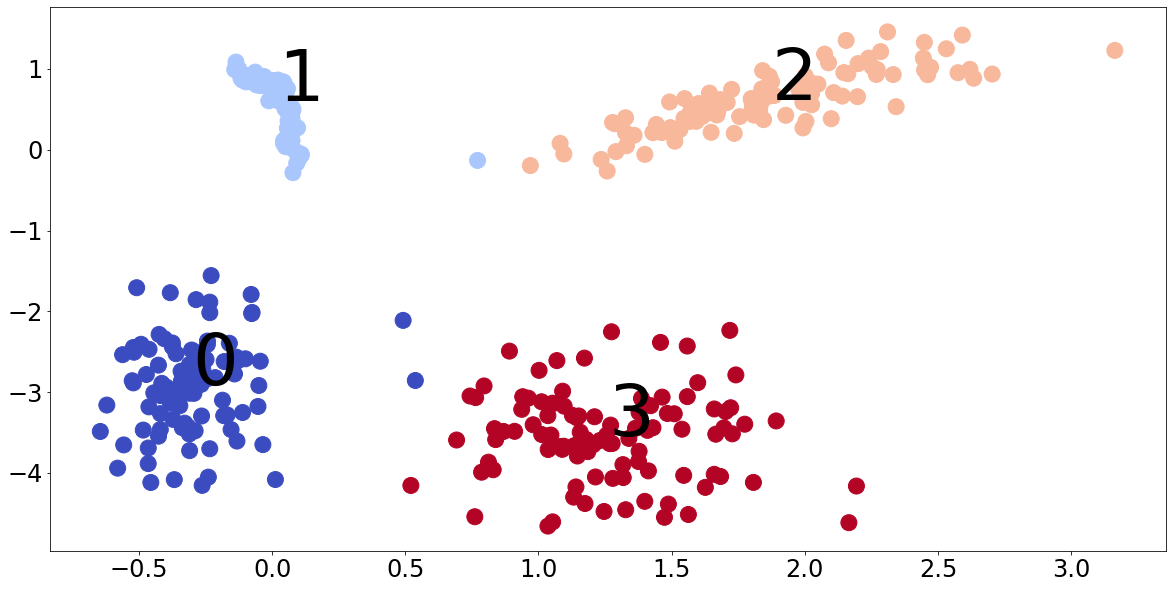

In [7]:
means, centers, indices = plot_groups(x, rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

In [8]:
from eldr.explain.explain_cs import *

In [9]:
# Set epsilon for our metrics
epsilon = 0.5

Explainer = Explain(model, means, centers)

if True:
    Explainer.eval_epsilon(torch.tensor(x), indices, epsilon)

In [10]:
# initial_deltas = np.zeros((num_clusters - 1, means.shape[1]))
# for i in range(1, num_clusters):
#     initial_deltas[i - 1,:] = means[i,:] - means[0,:]

In [11]:
import os
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 10
lg = 1.5
config = SimpleNamespace(**json.load(open('./configs/tgt.json', 'r')))
for i in range(ntrials):
    print("Trial: ", i)
    Explainer = Explain(model, means, centers)
    deltas, tgt = Explainer.explain(config)#model, means, centers, learning_rate = 0.01, consecutive_steps = 5, init_mode='mean', lambda_global = lg)
#     print("Deltas: ", deltas)
    a, b = Explainer.metrics(torch.tensor(x), indices, deltas, epsilon)
    
    val = np.mean(a)
    
    if val > best_val:
        best_val = val
        print("best_val ", best_val, "deltas ", deltas)
        np.save("deltas.npy", deltas)
    
    os.system("rm -rf explanation")

Trial:  0
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 17.29405975341797, initial 2, target 0
Retrieving the best deltas...
iter: 1, ema: 17.272426462173463, initial 2, target 0
Retrieving the best deltas...
iter: 2, ema: 17.230986520290376, initial 2, target 0
Retrieving the best deltas...
iter: 3, ema: 17.171459772381784, initial 2, target 0
Retrieving the best deltas...
iter: 4, ema: 17.09462935091224, initial 2, target 0
Retrieving the best deltas...
iter: 5, ema: 17.00049754199937, initial 2, target 0
Retrieving the best deltas...
iter: 6, ema: 16.892027572148834, initial 2, target 0
Retrieving the best deltas...
iter: 7, ema: 16.77584892412052, initial 2, target 0
Retrieving the best deltas...
iter: 8, ema: 16.653080154270185, initial 2, target 0
Retrieving the best deltas..

Retrieving the best deltas...
iter: 172, ema: 4.841536636062195, initial 1, target 2
Retrieving the best deltas...
iter: 173, ema: 4.798269440291974, initial 1, target 2
Retrieving the best deltas...
iter: 174, ema: 4.755234979851114, initial 1, target 2
Retrieving the best deltas...
iter: 175, ema: 4.712544462313688, initial 1, target 2
Retrieving the best deltas...
iter: 176, ema: 4.670233385580909, initial 1, target 2
Retrieving the best deltas...
iter: 177, ema: 4.628311391919802, initial 1, target 2
Retrieving the best deltas...
iter: 178, ema: 4.586779313571702, initial 1, target 2
Retrieving the best deltas...
iter: 179, ema: 4.5456349888588745, initial 1, target 2
Retrieving the best deltas...
iter: 180, ema: 4.507654418622881, initial 2, target 3
Retrieving the best deltas...
iter: 181, ema: 4.4700458572056645, initial 2, target 3
Retrieving the best deltas...
iter: 182, ema: 4.432795399873385, initial 2, target 3
Retrieving the best deltas...
iter: 183, ema: 4.395938141251046

Retrieving the best deltas...
iter: 291, ema: 2.2468274008613585, initial 1, target 3
Retrieving the best deltas...
iter: 292, ema: 2.237267057465309, initial 1, target 3
Retrieving the best deltas...
iter: 293, ema: 2.2277572861940924, initial 1, target 3
Retrieving the best deltas...
iter: 294, ema: 2.218299119126295, initial 1, target 3
Retrieving the best deltas...
iter: 295, ema: 2.208893480268101, initial 1, target 3
Retrieving the best deltas...
iter: 296, ema: 2.1995411973628505, initial 1, target 3
Retrieving the best deltas...
iter: 297, ema: 2.1902430100062262, initial 1, target 3
Retrieving the best deltas...
iter: 298, ema: 2.1809995884091244, initial 1, target 3
Retrieving the best deltas...
iter: 299, ema: 2.171811529323129, initial 1, target 3
Retrieving the best deltas...
iter: 300, ema: 2.1563564185712947, initial 1, target 2
Retrieving the best deltas...
iter: 301, ema: 2.1401363547613297, initial 1, target 2
Retrieving the best deltas...
iter: 302, ema: 2.1238958009

Retrieving the best deltas...
iter: 429, ema: 1.4099827670787466, initial 3, target 1
Retrieving the best deltas...
iter: 430, ema: 1.4073112049795533, initial 1, target 3
Retrieving the best deltas...
iter: 431, ema: 1.4046578862971437, initial 1, target 3
Retrieving the best deltas...
iter: 432, ema: 1.402029321006865, initial 1, target 3
Retrieving the best deltas...
iter: 433, ema: 1.3994237154303109, initial 1, target 3
Retrieving the best deltas...
iter: 434, ema: 1.3968385797622138, initial 1, target 3
Retrieving the best deltas...
iter: 435, ema: 1.3942743816438825, initial 1, target 3
Retrieving the best deltas...
iter: 436, ema: 1.3917314743676659, initial 1, target 3
Retrieving the best deltas...
iter: 437, ema: 1.3892101182860224, initial 1, target 3
Retrieving the best deltas...
iter: 438, ema: 1.3867113626975682, initial 1, target 3
Retrieving the best deltas...
iter: 439, ema: 1.384242324889608, initial 1, target 3
Retrieving the best deltas...
iter: 469, ema: 1.38074703

Retrieving the best deltas...
iter: 772, ema: 0.8674141024474238, initial 3, target 2
Retrieving the best deltas...
iter: 773, ema: 0.8661093092336948, initial 3, target 2
Retrieving the best deltas...
iter: 774, ema: 0.8647735411535649, initial 3, target 2
Retrieving the best deltas...
iter: 775, ema: 0.8634145138328114, initial 3, target 2
Retrieving the best deltas...
iter: 776, ema: 0.862034628876864, initial 3, target 2
Retrieving the best deltas...
iter: 777, ema: 0.8606348917761752, initial 3, target 2
Retrieving the best deltas...
iter: 778, ema: 0.8592159296095884, initial 3, target 2
Retrieving the best deltas...
iter: 779, ema: 0.8577782576849372, initial 3, target 2
Retrieving the best deltas...
iter: 780, ema: 0.8546905194634803, initial 0, target 3
Retrieving the best deltas...
iter: 781, ema: 0.8515627666478814, initial 0, target 3
Retrieving the best deltas...
iter: 782, ema: 0.8483999871535904, initial 0, target 3
Retrieving the best deltas...
iter: 783, ema: 0.8452065

best_val  0.860023502350235 deltas  tensor([[-1.0173e+00, -1.2849e-02, -1.8721e-03, -9.0199e-01],
        [-1.0576e+00,  1.0035e+00, -1.8366e-03, -9.0333e-01],
        [ 1.5111e-03,  9.3617e-01, -5.0126e-03, -1.4514e-04]])
Trial:  1
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 2.6767241954803467, initial 0, target 3
Retrieving the best deltas...
iter: 1, ema: 2.6705662083625796, initial 0, target 3
Retrieving the best deltas...
iter: 2, ema: 2.659541875052452, initial 0, target 3
Retrieving the best deltas...
iter: 3, ema: 2.6447310682423115, initial 0, target 3
Retrieving the best deltas...
iter: 4, ema: 2.6269963473006417, initial 0, target 3
Retrieving the best deltas...
iter: 5, ema: 2.6070244645103897, initial 0, target 3
Retrieving the best deltas...
iter: 6, ema: 2.58578146

Retrieving the best deltas...
iter: 284, ema: 1.2387330140124022, initial 3, target 2
Retrieving the best deltas...
iter: 285, ema: 1.235303763687189, initial 3, target 2
Retrieving the best deltas...
iter: 286, ema: 1.2318538432301878, initial 3, target 2
Retrieving the best deltas...
iter: 287, ema: 1.2283852874171715, initial 3, target 2
Retrieving the best deltas...
iter: 288, ema: 1.2248996183417897, initial 3, target 2
Retrieving the best deltas...
iter: 289, ema: 1.2213981747916574, initial 3, target 2
Retrieving the best deltas...
iter: 309, ema: 1.2189457771232923, initial 1, target 2
Retrieving the best deltas...
iter: 310, ema: 1.212254359074502, initial 1, target 2
Retrieving the best deltas...
iter: 311, ema: 1.2056171725298843, initial 1, target 2
Retrieving the best deltas...
iter: 312, ema: 1.1990339827343643, initial 1, target 2
Retrieving the best deltas...
iter: 313, ema: 1.1925045399950716, initial 1, target 2
Retrieving the best deltas...
iter: 314, ema: 1.18602858

Retrieving the best deltas...
iter: 721, ema: 0.8418857023803599, initial 0, target 3
Retrieving the best deltas...
iter: 722, ema: 0.8373519988885845, initial 0, target 3
Retrieving the best deltas...
iter: 723, ema: 0.8328237628848366, initial 0, target 3
Retrieving the best deltas...
iter: 724, ema: 0.8283387126477462, initial 0, target 3
Retrieving the best deltas...
iter: 725, ema: 0.823875831259527, initial 0, target 3
Retrieving the best deltas...
iter: 726, ema: 0.8194510424398441, initial 0, target 3
Retrieving the best deltas...
iter: 727, ema: 0.8150609063526421, initial 0, target 3
Retrieving the best deltas...
iter: 728, ema: 0.8107017880823438, initial 0, target 3
Retrieving the best deltas...
iter: 729, ema: 0.806372704812364, initial 0, target 3
Retrieving the best deltas...
iter: 1788, ema: 0.8055235201443547, initial 2, target 1
Retrieving the best deltas...
iter: 1789, ema: 0.802121943213747, initial 2, target 1
Retrieving the best deltas...
iter: 1790, ema: 0.798723

Retrieving the best deltas...
iter: 120, ema: 6.526586479948216, initial 0, target 3
Retrieving the best deltas...
iter: 121, ema: 6.466457827425193, initial 0, target 3
Retrieving the best deltas...
iter: 122, ema: 6.406747432252596, initial 0, target 3
Retrieving the best deltas...
iter: 123, ema: 6.347472678009492, initial 0, target 3
Retrieving the best deltas...
iter: 124, ema: 6.288647805829826, initial 0, target 3
Retrieving the best deltas...
iter: 125, ema: 6.2303005627077646, initial 0, target 3
Retrieving the best deltas...
iter: 126, ema: 6.172458944178523, initial 0, target 3
Retrieving the best deltas...
iter: 127, ema: 6.115130773963861, initial 0, target 3
Retrieving the best deltas...
iter: 128, ema: 6.058321343327074, initial 0, target 3
Retrieving the best deltas...
iter: 129, ema: 6.002033901611829, initial 0, target 3
Retrieving the best deltas...
iter: 130, ema: 5.963034447109566, initial 2, target 1
Retrieving the best deltas...
iter: 131, ema: 5.9200230267794005

Retrieving the best deltas...
iter: 245, ema: 2.8987235931389943, initial 1, target 0
Retrieving the best deltas...
iter: 246, ema: 2.878991758103677, initial 1, target 0
Retrieving the best deltas...
iter: 247, ema: 2.85929109704768, initial 1, target 0
Retrieving the best deltas...
iter: 248, ema: 2.8396476166621105, initial 1, target 0
Retrieving the best deltas...
iter: 249, ema: 2.8200902041398987, initial 1, target 0
Retrieving the best deltas...
iter: 250, ema: 2.806166533791768, initial 0, target 2
Retrieving the best deltas...
iter: 251, ema: 2.7899279885710375, initial 0, target 2
Retrieving the best deltas...
iter: 252, ema: 2.7729118909725434, initial 0, target 2
Retrieving the best deltas...
iter: 253, ema: 2.755806457184354, initial 0, target 2
Retrieving the best deltas...
iter: 254, ema: 2.7387899556465682, initial 0, target 2
Retrieving the best deltas...
iter: 255, ema: 2.7219077585856772, initial 0, target 2
Retrieving the best deltas...
iter: 256, ema: 2.70517061197

Retrieving the best deltas...
iter: 386, ema: 1.5817731690767836, initial 2, target 3
Retrieving the best deltas...
iter: 387, ema: 1.5743330561756885, initial 2, target 3
Retrieving the best deltas...
iter: 388, ema: 1.5669331057075062, initial 2, target 3
Retrieving the best deltas...
iter: 389, ema: 1.5595769059828286, initial 2, target 3
Retrieving the best deltas...
iter: 390, ema: 1.5522673436452599, initial 2, target 3
Retrieving the best deltas...
iter: 391, ema: 1.5450067263210967, initial 2, target 3
Retrieving the best deltas...
iter: 392, ema: 1.5377968790085617, initial 2, target 3
Retrieving the best deltas...
iter: 393, ema: 1.53063923175454, initial 2, target 3
Retrieving the best deltas...
iter: 394, ema: 1.5235348861889708, initial 2, target 3
Retrieving the best deltas...
iter: 395, ema: 1.5164846748373808, initial 2, target 3
Retrieving the best deltas...
iter: 396, ema: 1.5094892043430888, initial 2, target 3
Retrieving the best deltas...
iter: 397, ema: 1.50254889

Retrieving the best deltas...
iter: 718, ema: 0.8410988528933779, initial 0, target 3
Retrieving the best deltas...
iter: 719, ema: 0.8367627710712542, initial 0, target 3
Retrieving the best deltas...
iter: 720, ema: 0.8357818081087335, initial 0, target 1
Retrieving the best deltas...
iter: 721, ema: 0.8346242507860461, initial 0, target 1
Retrieving the best deltas...
iter: 722, ema: 0.8333786607344692, initial 0, target 1
Retrieving the best deltas...
iter: 723, ema: 0.8320890791966664, initial 0, target 1
Retrieving the best deltas...
iter: 724, ema: 0.8307774109121766, initial 0, target 1
Retrieving the best deltas...
iter: 725, ema: 0.8294545513442994, initial 0, target 1
Retrieving the best deltas...
iter: 726, ema: 0.8281259201994858, initial 0, target 1
Retrieving the best deltas...
iter: 727, ema: 0.8268078287840892, initial 0, target 1
Retrieving the best deltas...
iter: 728, ema: 0.8254952435887852, initial 0, target 1
Retrieving the best deltas...
iter: 729, ema: 0.824180

Trial:  3
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 2.80761981010437, initial 3, target 0
Retrieving the best deltas...
iter: 1, ema: 2.806334948539734, initial 3, target 0
Retrieving the best deltas...
iter: 2, ema: 2.8041585829257967, initial 3, target 0
Retrieving the best deltas...
iter: 3, ema: 2.801199153754711, initial 3, target 0
Retrieving the best deltas...
iter: 4, ema: 2.7975482957926037, initial 3, target 0
Retrieving the best deltas...
iter: 5, ema: 2.793283685961661, initial 3, target 0
Retrieving the best deltas...
iter: 6, ema: 2.7884714121322873, initial 3, target 0
Retrieving the best deltas...
iter: 7, ema: 2.7831679081473784, initial 3, target 0
Retrieving the best deltas...
iter: 8, ema: 2.7774215810098744, initial 3, target 0
Retrieving the best deltas...

Retrieving the best deltas...
iter: 298, ema: 1.48758935868042, initial 3, target 2
Retrieving the best deltas...
iter: 299, ema: 1.480248635410312, initial 3, target 2
Retrieving the best deltas...
iter: 300, ema: 1.4786632453849442, initial 3, target 0
Retrieving the best deltas...
iter: 301, ema: 1.476873904019199, initial 3, target 0
Retrieving the best deltas...
iter: 302, ema: 1.4748953525762816, initial 3, target 0
Retrieving the best deltas...
iter: 303, ema: 1.4727409344013183, initial 3, target 0
Retrieving the best deltas...
iter: 304, ema: 1.4704227853302847, initial 3, target 0
Retrieving the best deltas...
iter: 305, ema: 1.467952007889732, initial 3, target 0
Retrieving the best deltas...
iter: 306, ema: 1.4653388044154487, initial 3, target 0
Retrieving the best deltas...
iter: 307, ema: 1.4625925873822654, initial 3, target 0
Retrieving the best deltas...
iter: 308, ema: 1.4597220802859086, initial 3, target 0
Retrieving the best deltas...
iter: 309, ema: 1.45673539605

Retrieving the best deltas...
iter: 1059, ema: 0.9382378037801913, initial 0, target 1
Retrieving the best deltas...
iter: 1111, ema: 0.9376548450406609, initial 3, target 2
Retrieving the best deltas...
iter: 1112, ema: 0.935617007613585, initial 3, target 2
Retrieving the best deltas...
iter: 1113, ema: 0.9335654076162989, initial 3, target 2
Retrieving the best deltas...
iter: 1114, ema: 0.9315007936221138, initial 3, target 2
Retrieving the best deltas...
iter: 1115, ema: 0.9294236724723535, initial 3, target 2
Retrieving the best deltas...
iter: 1116, ema: 0.9273344785866803, initial 3, target 2
Retrieving the best deltas...
iter: 1117, ema: 0.9252336152184694, initial 3, target 2
Retrieving the best deltas...
iter: 1118, ema: 0.9231252337009511, initial 3, target 2
Retrieving the best deltas...
iter: 1119, ema: 0.9210235843922391, initial 3, target 2
Retrieving the best deltas...
iter: 1173, ema: 0.9161919661152979, initial 1, target 2
Retrieving the best deltas...
iter: 1174, em

Trial:  4
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 2.6767241954803467, initial 0, target 3
Retrieving the best deltas...
iter: 1, ema: 2.6705662083625796, initial 0, target 3
Retrieving the best deltas...
iter: 2, ema: 2.659541875052452, initial 0, target 3
Retrieving the best deltas...
iter: 3, ema: 2.6447310682423115, initial 0, target 3
Retrieving the best deltas...
iter: 4, ema: 2.6269963473006417, initial 0, target 3
Retrieving the best deltas...
iter: 5, ema: 2.6070244645103897, initial 0, target 3
Retrieving the best deltas...
iter: 6, ema: 2.5857814617628687, initial 0, target 3
Retrieving the best deltas...
iter: 7, ema: 2.5643154383697198, initial 0, target 3
Retrieving the best deltas...
iter: 8, ema: 2.5429343674568443, initial 0, target 3
Retrieving the best delta

Retrieving the best deltas...
iter: 282, ema: 1.3763795041037765, initial 2, target 3
Retrieving the best deltas...
iter: 283, ema: 1.3710129061900809, initial 2, target 3
Retrieving the best deltas...
iter: 284, ema: 1.365656049804648, initial 2, target 3
Retrieving the best deltas...
iter: 285, ema: 1.3603124179832067, initial 2, target 3
Retrieving the best deltas...
iter: 286, ema: 1.3549849207011866, initial 2, target 3
Retrieving the best deltas...
iter: 287, ema: 1.3496759882231482, initial 2, target 3
Retrieving the best deltas...
iter: 288, ema: 1.3443876563661623, initial 2, target 3
Retrieving the best deltas...
iter: 289, ema: 1.339121625876605, initial 2, target 3
Retrieving the best deltas...
iter: 295, ema: 1.3387299624824425, initial 1, target 3
Retrieving the best deltas...
iter: 296, ema: 1.337551005409803, initial 1, target 3
Retrieving the best deltas...
iter: 297, ema: 1.336207497566322, initial 1, target 3
Retrieving the best deltas...
iter: 298, ema: 1.3347335236

Retrieving the best deltas...
iter: 466, ema: 1.0199518720472278, initial 3, target 2
Retrieving the best deltas...
iter: 467, ema: 1.017923209564167, initial 3, target 2
Retrieving the best deltas...
iter: 468, ema: 1.015862387578999, initial 3, target 2
Retrieving the best deltas...
iter: 469, ema: 1.013770889977318, initial 3, target 2
Retrieving the best deltas...
iter: 470, ema: 1.0093661840978314, initial 3, target 0
Retrieving the best deltas...
iter: 471, ema: 1.004491571114542, initial 3, target 0
Retrieving the best deltas...
iter: 472, ema: 0.9993358107316703, initial 3, target 0
Retrieving the best deltas...
iter: 473, ema: 0.9940391189246504, initial 3, target 0
Retrieving the best deltas...
iter: 474, ema: 0.9886809632505215, initial 3, target 0
Retrieving the best deltas...
iter: 475, ema: 0.9833483204118395, initial 3, target 0
Retrieving the best deltas...
iter: 476, ema: 0.9780114491605029, initial 3, target 0
Retrieving the best deltas...
iter: 477, ema: 0.9727323436

Retrieving the best deltas...
iter: 2917, ema: 0.6655503028018612, initial 1, target 2
Retrieving the best deltas...
iter: 2918, ema: 0.6628551198293273, initial 1, target 2
Retrieving the best deltas...
iter: 2919, ema: 0.6601749728239585, initial 1, target 2
Retrieving the best deltas...
iter: 2944, ema: 0.6581274802706751, initial 2, target 1
Retrieving the best deltas...
iter: 2945, ema: 0.655567226297646, initial 2, target 1
Retrieving the best deltas...
iter: 2946, ema: 0.6530138840398384, initial 2, target 1
Retrieving the best deltas...
iter: 2947, ema: 0.6504948969900589, initial 2, target 1
Retrieving the best deltas...
iter: 2948, ema: 0.6479894047834258, initial 2, target 1
Retrieving the best deltas...
iter: 2949, ema: 0.645513705174049, initial 2, target 1
Retrieving the best deltas...
iter: 2950, ema: 0.6431515964292696, initial 1, target 2
Retrieving the best deltas...
iter: 2951, ema: 0.6407681474982677, initial 1, target 2
Retrieving the best deltas...
iter: 2952, ema

Retrieving the best deltas...
iter: 151, ema: 5.623844887658585, initial 0, target 3
Retrieving the best deltas...
iter: 152, ema: 5.572748432543062, initial 0, target 3
Retrieving the best deltas...
iter: 153, ema: 5.521938405023337, initial 0, target 3
Retrieving the best deltas...
iter: 154, ema: 5.47153553522672, initial 0, target 3
Retrieving the best deltas...
iter: 155, ema: 5.421575154418501, initial 0, target 3
Retrieving the best deltas...
iter: 156, ema: 5.3720737073810945, initial 0, target 3
Retrieving the best deltas...
iter: 157, ema: 5.323037668292932, initial 0, target 3
Retrieving the best deltas...
iter: 158, ema: 5.274468254728079, initial 0, target 3
Retrieving the best deltas...
iter: 159, ema: 5.226367643342545, initial 0, target 3
Retrieving the best deltas...
iter: 160, ema: 5.207921029287049, initial 1, target 0
Retrieving the best deltas...
iter: 161, ema: 5.187889527028695, initial 1, target 0
Retrieving the best deltas...
iter: 162, ema: 5.166416529852586, 

Retrieving the best deltas...
iter: 273, ema: 2.711711732558273, initial 2, target 0
Retrieving the best deltas...
iter: 274, ema: 2.7028070790884335, initial 2, target 0
Retrieving the best deltas...
iter: 275, ema: 2.69384118261777, initial 2, target 0
Retrieving the best deltas...
iter: 276, ema: 2.68482256392056, initial 2, target 0
Retrieving the best deltas...
iter: 277, ema: 2.6757589552285284, initial 2, target 0
Retrieving the best deltas...
iter: 278, ema: 2.666657405867894, initial 2, target 0
Retrieving the best deltas...
iter: 279, ema: 2.6575243677665514, initial 2, target 0
Retrieving the best deltas...
iter: 280, ema: 2.64730643629134, initial 3, target 0
Retrieving the best deltas...
iter: 281, ema: 2.637081552794668, initial 3, target 0
Retrieving the best deltas...
iter: 282, ema: 2.626854474106016, initial 3, target 0
Retrieving the best deltas...
iter: 283, ema: 2.6166292252252465, initial 3, target 0
Retrieving the best deltas...
iter: 284, ema: 2.606409228234377,

Retrieving the best deltas...
iter: 535, ema: 1.1683831331968186, initial 1, target 0
Retrieving the best deltas...
iter: 536, ema: 1.164531765248525, initial 1, target 0
Retrieving the best deltas...
iter: 537, ema: 1.1606865712875984, initial 1, target 0
Retrieving the best deltas...
iter: 538, ema: 1.1568509031321716, initial 1, target 0
Retrieving the best deltas...
iter: 539, ema: 1.1530362347857406, initial 1, target 0
Retrieving the best deltas...
iter: 540, ema: 1.1492284504865893, initial 1, target 0
Retrieving the best deltas...
iter: 541, ema: 1.1454319088272586, initial 1, target 0
Retrieving the best deltas...
iter: 542, ema: 1.1416490210420105, initial 1, target 0
Retrieving the best deltas...
iter: 543, ema: 1.1378812438242585, initial 1, target 0
Retrieving the best deltas...
iter: 544, ema: 1.1341345146827917, initial 1, target 0
Retrieving the best deltas...
iter: 545, ema: 1.1304124920743397, initial 1, target 0
Retrieving the best deltas...
iter: 546, ema: 1.1267014

Retrieving the best deltas...
iter: 1598, ema: 0.8498774358447821, initial 0, target 3
Retrieving the best deltas...
iter: 1599, ema: 0.8452477304069467, initial 0, target 3
Retrieving the best deltas...
iter: 1600, ema: 0.8450756781745935, initial 1, target 0
Retrieving the best deltas...
iter: 1601, ema: 0.8446353386158243, initial 1, target 0
Retrieving the best deltas...
iter: 1602, ema: 0.8440018780242751, initial 1, target 0
Retrieving the best deltas...
iter: 1603, ema: 0.8432954951464371, initial 1, target 0
Retrieving the best deltas...
iter: 1604, ema: 0.8425690154528462, initial 1, target 0
Retrieving the best deltas...
iter: 1605, ema: 0.8418247421674814, initial 1, target 0
Retrieving the best deltas...
iter: 1606, ema: 0.8410679047199048, initial 1, target 0
Retrieving the best deltas...
iter: 1607, ema: 0.8403329187078314, initial 1, target 0
Retrieving the best deltas...
iter: 1608, ema: 0.8395775210965283, initial 1, target 0
Retrieving the best deltas...
iter: 1609, e

best_val  0.8600485048504851 deltas  tensor([[-1.0246e+00,  1.2102e-02,  2.2998e-03, -8.7103e-01],
        [-1.0484e+00,  9.4026e-01, -3.8312e-03, -8.7133e-01],
        [ 3.4350e-03,  9.2456e-01, -9.6768e-04,  2.0822e-03]])
Trial:  6
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 13.333837509155273, initial 1, target 0
Retrieving the best deltas...
iter: 1, ema: 13.310442295074463, initial 1, target 0
Retrieving the best deltas...
iter: 2, ema: 13.270760704612732, initial 1, target 0
Retrieving the best deltas...
iter: 3, ema: 13.216833295663834, initial 1, target 0
Retrieving the best deltas...
iter: 4, ema: 13.150126479087506, initial 1, target 0
Retrieving the best deltas...
iter: 5, ema: 13.07244830389624, initial 1, target 0
Retrieving the best deltas...
iter: 6, ema: 12.989565

Retrieving the best deltas...
iter: 122, ema: 5.4634807636787635, initial 0, target 2
Retrieving the best deltas...
iter: 123, ema: 5.439834973528548, initial 0, target 2
Retrieving the best deltas...
iter: 124, ema: 5.407649534445423, initial 0, target 2
Retrieving the best deltas...
iter: 125, ema: 5.369063842819536, initial 0, target 2
Retrieving the best deltas...
iter: 126, ema: 5.326940005462507, initial 0, target 2
Retrieving the best deltas...
iter: 127, ema: 5.284212521301437, initial 0, target 2
Retrieving the best deltas...
iter: 128, ema: 5.241685779761137, initial 0, target 2
Retrieving the best deltas...
iter: 129, ema: 5.1994980147999055, initial 0, target 2
Retrieving the best deltas...
iter: 130, ema: 5.169895975173147, initial 3, target 0
Retrieving the best deltas...
iter: 131, ema: 5.14004041065457, initial 3, target 0
Retrieving the best deltas...
iter: 132, ema: 5.110015901094533, initial 3, target 0
Retrieving the best deltas...
iter: 133, ema: 5.079889975234069,

Retrieving the best deltas...
iter: 284, ema: 1.948441253506512, initial 3, target 1
Retrieving the best deltas...
iter: 285, ema: 1.9404315612110863, initial 3, target 1
Retrieving the best deltas...
iter: 286, ema: 1.9324671161949074, initial 3, target 1
Retrieving the best deltas...
iter: 287, ema: 1.9245510637215417, initial 3, target 1
Retrieving the best deltas...
iter: 288, ema: 1.9166846829709536, initial 3, target 1
Retrieving the best deltas...
iter: 289, ema: 1.908868346261636, initial 3, target 1
Retrieving the best deltas...
iter: 290, ema: 1.9046771690360498, initial 3, target 0
Retrieving the best deltas...
iter: 291, ema: 1.9002600868007216, initial 3, target 0
Retrieving the best deltas...
iter: 292, ema: 1.8956296964353387, initial 3, target 0
Retrieving the best deltas...
iter: 293, ema: 1.890798057578743, initial 3, target 0
Retrieving the best deltas...
iter: 294, ema: 1.885776724227382, initial 3, target 0
Retrieving the best deltas...
iter: 295, ema: 1.8805767533

Retrieving the best deltas...
iter: 439, ema: 1.2157695344476072, initial 1, target 0
Retrieving the best deltas...
iter: 440, ema: 1.211796604084401, initial 0, target 1
Retrieving the best deltas...
iter: 441, ema: 1.207292602720414, initial 0, target 1
Retrieving the best deltas...
iter: 442, ema: 1.2027143957216828, initial 0, target 1
Retrieving the best deltas...
iter: 443, ema: 1.1981222165405052, initial 0, target 1
Retrieving the best deltas...
iter: 444, ema: 1.1935394238880779, initial 0, target 1
Retrieving the best deltas...
iter: 445, ema: 1.1889779485401504, initial 0, target 1
Retrieving the best deltas...
iter: 446, ema: 1.1844602974221727, initial 0, target 1
Retrieving the best deltas...
iter: 447, ema: 1.179955349608855, initial 0, target 1
Retrieving the best deltas...
iter: 448, ema: 1.1754799814841654, initial 0, target 1
Retrieving the best deltas...
iter: 449, ema: 1.171043579429715, initial 0, target 1
Retrieving the best deltas...
iter: 450, ema: 1.1700994412

Retrieving the best deltas...
iter: 884, ema: 0.8167720785978154, initial 0, target 3
Retrieving the best deltas...
iter: 885, ema: 0.812619162175088, initial 0, target 3
Retrieving the best deltas...
iter: 886, ema: 0.808484129157959, initial 0, target 3
Retrieving the best deltas...
iter: 887, ema: 0.8043861546385542, initial 0, target 3
Retrieving the best deltas...
iter: 888, ema: 0.8002948722924365, initial 0, target 3
Retrieving the best deltas...
iter: 889, ema: 0.7962476996649024, initial 0, target 3
Retrieving the best deltas...
iter: 1258, ema: 0.7948251263568283, initial 1, target 2
Retrieving the best deltas...
iter: 1259, ema: 0.7912800314333823, initial 1, target 2
Retrieving the best deltas...
iter: 1260, ema: 0.7877492152933, initial 1, target 2
Retrieving the best deltas...
iter: 1261, ema: 0.7842068726669631, initial 1, target 2
Retrieving the best deltas...
iter: 1262, ema: 0.7806789163055393, initial 1, target 2
Retrieving the best deltas...
iter: 1263, ema: 0.77715

best_val  0.8631300630063006 deltas  tensor([[-1.0129e+00, -2.3667e-02, -2.4957e-04, -8.8354e-01],
        [-1.0537e+00,  9.9260e-01, -2.6323e-03, -8.8356e-01],
        [ 1.6567e-04,  8.9135e-01, -4.7237e-03, -8.5656e-04]])
Trial:  7
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 2.6767241954803467, initial 0, target 3
Retrieving the best deltas...
iter: 1, ema: 2.6705662083625796, initial 0, target 3
Retrieving the best deltas...
iter: 2, ema: 2.659541875052452, initial 0, target 3
Retrieving the best deltas...
iter: 3, ema: 2.6447310682423115, initial 0, target 3
Retrieving the best deltas...
iter: 4, ema: 2.6269963473006417, initial 0, target 3
Retrieving the best deltas...
iter: 5, ema: 2.6070244645103897, initial 0, target 3
Retrieving the best deltas...
iter: 6, ema: 2.5857814

Retrieving the best deltas...
iter: 273, ema: 1.4256321251453683, initial 3, target 2
Retrieving the best deltas...
iter: 274, ema: 1.4200900548161177, initial 3, target 2
Retrieving the best deltas...
iter: 275, ema: 1.4145631768233078, initial 3, target 2
Retrieving the best deltas...
iter: 276, ema: 1.4090527190911006, initial 3, target 2
Retrieving the best deltas...
iter: 277, ema: 1.4035592666472751, initial 3, target 2
Retrieving the best deltas...
iter: 278, ema: 1.398083215683073, initial 3, target 2
Retrieving the best deltas...
iter: 279, ema: 1.3926248922666673, initial 3, target 2
Retrieving the best deltas...
iter: 290, ema: 1.3893966021619946, initial 2, target 3
Retrieving the best deltas...
iter: 291, ema: 1.3843752613721174, initial 2, target 3
Retrieving the best deltas...
iter: 292, ema: 1.3793466506746712, initial 2, target 3
Retrieving the best deltas...
iter: 293, ema: 1.3743193906708389, initial 2, target 3
Retrieving the best deltas...
iter: 294, ema: 1.3693000

Retrieving the best deltas...
iter: 478, ema: 0.8996289739427688, initial 3, target 0
Retrieving the best deltas...
iter: 479, ema: 0.8950821885191942, initial 3, target 0
Retrieving the best deltas...
iter: 480, ema: 0.893540934466949, initial 0, target 1
Retrieving the best deltas...
iter: 481, ema: 0.8919511675697511, initial 0, target 1
Retrieving the best deltas...
iter: 482, ema: 0.890355733977092, initial 0, target 1
Retrieving the best deltas...
iter: 483, ema: 0.8887631494471127, initial 0, target 1
Retrieving the best deltas...
iter: 484, ema: 0.8871808807732668, initial 0, target 1
Retrieving the best deltas...
iter: 485, ema: 0.885587767668087, initial 0, target 1
Retrieving the best deltas...
iter: 486, ema: 0.8839982451483047, initial 0, target 1
Retrieving the best deltas...
iter: 487, ema: 0.8824256770282578, initial 0, target 1
Retrieving the best deltas...
iter: 488, ema: 0.8808540168747203, initial 0, target 1
Retrieving the best deltas...
iter: 489, ema: 0.879307802

Retrieving the best deltas...
iter: 2154, ema: 0.5981294647066573, initial 1, target 2
Retrieving the best deltas...
iter: 2155, ema: 0.5961045749839835, initial 1, target 2
Retrieving the best deltas...
iter: 2156, ema: 0.5940955812313284, initial 1, target 2
Retrieving the best deltas...
iter: 2157, ema: 0.592104358497495, initial 1, target 2
Retrieving the best deltas...
iter: 2158, ema: 0.5901248359610659, initial 1, target 2
Retrieving the best deltas...
iter: 2159, ema: 0.5881756804278216, initial 1, target 2
Trial:  8
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 19.582807540893555, initial 1, target 3
Retrieving the best deltas...
iter: 1, ema: 19.55594524383545, initial 1, target 3
Retrieving the best deltas...
iter: 2, ema: 19.50456688079834, initial 1, target 3
Retrievin

Retrieving the best deltas...
iter: 115, ema: 7.945277743937985, initial 3, target 0
Retrieving the best deltas...
iter: 116, ema: 7.885744882889977, initial 3, target 0
Retrieving the best deltas...
iter: 117, ema: 7.826613187130001, initial 3, target 0
Retrieving the best deltas...
iter: 118, ema: 7.767890753092717, initial 3, target 0
Retrieving the best deltas...
iter: 119, ema: 7.70958355657749, initial 3, target 0
Retrieving the best deltas...
iter: 120, ema: 7.64166994647749, initial 0, target 3
Retrieving the best deltas...
iter: 121, ema: 7.572051179399113, initial 0, target 3
Retrieving the best deltas...
iter: 122, ema: 7.501902508606633, initial 0, target 3
Retrieving the best deltas...
iter: 123, ema: 7.431753182700692, initial 0, target 3
Retrieving the best deltas...
iter: 124, ema: 7.361894244003797, initial 0, target 3
Retrieving the best deltas...
iter: 125, ema: 7.29256269018652, initial 0, target 3
Retrieving the best deltas...
iter: 126, ema: 7.2238657398421955, in

Retrieving the best deltas...
iter: 223, ema: 3.5475262967774146, initial 3, target 1
Retrieving the best deltas...
iter: 224, ema: 3.5244124291686796, initial 3, target 1
Retrieving the best deltas...
iter: 225, ema: 3.5014518339201905, initial 3, target 1
Retrieving the best deltas...
iter: 226, ema: 3.47866752230897, initial 3, target 1
Retrieving the best deltas...
iter: 227, ema: 3.4560709208144416, initial 3, target 1
Retrieving the best deltas...
iter: 228, ema: 3.433667250056538, initial 3, target 1
Retrieving the best deltas...
iter: 229, ema: 3.4114584073460876, initial 3, target 1
Retrieving the best deltas...
iter: 230, ema: 3.3857787710017373, initial 2, target 3
Retrieving the best deltas...
iter: 231, ema: 3.3602894140254005, initial 2, target 3
Retrieving the best deltas...
iter: 232, ema: 3.334998160505378, initial 2, target 3
Retrieving the best deltas...
iter: 233, ema: 3.3099110951076374, initial 2, target 3
Retrieving the best deltas...
iter: 234, ema: 3.2850328624

Retrieving the best deltas...
iter: 377, ema: 1.4937506709849997, initial 1, target 2
Retrieving the best deltas...
iter: 378, ema: 1.4836149648241799, initial 1, target 2
Retrieving the best deltas...
iter: 379, ema: 1.4735657515186542, initial 1, target 2
Retrieving the best deltas...
iter: 380, ema: 1.4703392895696452, initial 2, target 1
Retrieving the best deltas...
iter: 381, ema: 1.4659343359382462, initial 2, target 1
Retrieving the best deltas...
iter: 382, ema: 1.4610847238239046, initial 2, target 1
Retrieving the best deltas...
iter: 383, ema: 1.455938392033282, initial 2, target 1
Retrieving the best deltas...
iter: 384, ema: 1.4505620585070074, initial 2, target 1
Retrieving the best deltas...
iter: 385, ema: 1.4449932913307508, initial 2, target 1
Retrieving the best deltas...
iter: 386, ema: 1.4392669928988735, initial 2, target 1
Retrieving the best deltas...
iter: 387, ema: 1.4334354942631435, initial 2, target 1
Retrieving the best deltas...
iter: 388, ema: 1.4275107

Retrieving the best deltas...
iter: 821, ema: 0.8475936815439962, initial 0, target 3
Retrieving the best deltas...
iter: 822, ema: 0.8434820498671441, initial 0, target 3
Retrieving the best deltas...
iter: 823, ema: 0.8393796397636181, initial 0, target 3
Retrieving the best deltas...
iter: 824, ema: 0.8352945859487799, initial 0, target 3
Retrieving the best deltas...
iter: 825, ema: 0.8312238556249328, initial 0, target 3
Retrieving the best deltas...
iter: 826, ema: 0.8271723913234824, initial 0, target 3
Retrieving the best deltas...
iter: 827, ema: 0.8231361028364828, initial 0, target 3
Retrieving the best deltas...
iter: 828, ema: 0.8191176204525843, initial 0, target 3
Retrieving the best deltas...
iter: 829, ema: 0.8151117265380403, initial 0, target 3
Retrieving the best deltas...
iter: 841, ema: 0.8149071284593558, initial 1, target 2
Retrieving the best deltas...
iter: 842, ema: 0.8114140346623263, initial 1, target 2
Retrieving the best deltas...
iter: 843, ema: 0.807944

Trial:  9
zero
[Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 17.29405975341797, initial 2, target 0
Retrieving the best deltas...
iter: 1, ema: 17.272426462173463, initial 2, target 0
Retrieving the best deltas...
iter: 2, ema: 17.230986520290376, initial 2, target 0
Retrieving the best deltas...
iter: 3, ema: 17.171459772381784, initial 2, target 0
Retrieving the best deltas...
iter: 4, ema: 17.09462935091224, initial 2, target 0
Retrieving the best deltas...
iter: 5, ema: 17.00049754199937, initial 2, target 0
Retrieving the best deltas...
iter: 6, ema: 16.892027572148834, initial 2, target 0
Retrieving the best deltas...
iter: 7, ema: 16.77584892412052, initial 2, target 0
Retrieving the best deltas...
iter: 8, ema: 16.653080154270185, initial 2, target 0
Retrieving the best deltas..

Retrieving the best deltas...
iter: 121, ema: 6.751376645795408, initial 3, target 2
Retrieving the best deltas...
iter: 122, ema: 6.69244435078063, initial 3, target 2
Retrieving the best deltas...
iter: 123, ema: 6.633878338135251, initial 3, target 2
Retrieving the best deltas...
iter: 124, ema: 6.5757509302288275, initial 3, target 2
Retrieving the best deltas...
iter: 125, ema: 6.518080983249156, initial 3, target 2
Retrieving the best deltas...
iter: 126, ema: 6.4609105685859225, initial 3, target 2
Retrieving the best deltas...
iter: 127, ema: 6.404271288167855, initial 3, target 2
Retrieving the best deltas...
iter: 128, ema: 6.348158696111944, initial 3, target 2
Retrieving the best deltas...
iter: 129, ema: 6.292568174033103, initial 3, target 2
Retrieving the best deltas...
iter: 130, ema: 6.237495075820337, initial 3, target 2
Retrieving the best deltas...
iter: 131, ema: 6.182934760100509, initial 3, target 2
Retrieving the best deltas...
iter: 132, ema: 6.128882608668404,

Retrieving the best deltas...
iter: 219, ema: 2.9731924567157564, initial 2, target 3
Retrieving the best deltas...
iter: 220, ema: 2.9523054829437725, initial 2, target 3
Retrieving the best deltas...
iter: 221, ema: 2.9314769636081857, initial 2, target 3
Retrieving the best deltas...
iter: 222, ema: 2.9107265749754836, initial 2, target 3
Retrieving the best deltas...
iter: 223, ema: 2.8901345479876306, initial 2, target 3
Retrieving the best deltas...
iter: 224, ema: 2.869703225186129, initial 2, target 3
Retrieving the best deltas...
iter: 225, ema: 2.849434338581317, initial 2, target 3
Retrieving the best deltas...
iter: 226, ema: 2.8293291170855714, initial 2, target 3
Retrieving the best deltas...
iter: 227, ema: 2.8093883743947496, initial 2, target 3
Retrieving the best deltas...
iter: 228, ema: 2.7896125781094128, initial 2, target 3
Retrieving the best deltas...
iter: 229, ema: 2.770001914588565, initial 2, target 3
Retrieving the best deltas...
iter: 230, ema: 2.750556328

Retrieving the best deltas...
iter: 337, ema: 1.6836118134424836, initial 0, target 3
Retrieving the best deltas...
iter: 338, ema: 1.670979261918872, initial 0, target 3
Retrieving the best deltas...
iter: 339, ema: 1.6584329982785078, initial 0, target 3
Retrieving the best deltas...
iter: 340, ema: 1.654174241263252, initial 1, target 3
Retrieving the best deltas...
iter: 341, ema: 1.6498376668594237, initial 1, target 3
Retrieving the best deltas...
iter: 342, ema: 1.6454435952197448, initial 1, target 3
Retrieving the best deltas...
iter: 343, ema: 1.6410087935143736, initial 1, target 3
Retrieving the best deltas...
iter: 344, ema: 1.6365470860495057, initial 1, target 3
Retrieving the best deltas...
iter: 345, ema: 1.6320698724541016, initial 1, target 3
Retrieving the best deltas...
iter: 346, ema: 1.6275865357805708, initial 1, target 3
Retrieving the best deltas...
iter: 347, ema: 1.6231048012249196, initial 1, target 3
Retrieving the best deltas...
iter: 348, ema: 1.61863102

Retrieving the best deltas...
iter: 878, ema: 0.9104334746840589, initial 3, target 0
Retrieving the best deltas...
iter: 879, ema: 0.9055756069911085, initial 3, target 0
Retrieving the best deltas...
iter: 958, ema: 0.9033694057917961, initial 0, target 1
Retrieving the best deltas...
iter: 959, ema: 0.9008939368887549, initial 0, target 1
Retrieving the best deltas...
iter: 960, ema: 0.8965401751130985, initial 3, target 0
Retrieving the best deltas...
iter: 961, ema: 0.8920640295055374, initial 3, target 0
Retrieving the best deltas...
iter: 962, ema: 0.8875121253583627, initial 3, target 0
Retrieving the best deltas...
iter: 963, ema: 0.8829113947426537, initial 3, target 0
Retrieving the best deltas...
iter: 964, ema: 0.8782790253564224, initial 3, target 0
Retrieving the best deltas...
iter: 965, ema: 0.8736270166937968, initial 3, target 0
Retrieving the best deltas...
iter: 966, ema: 0.8689782086540675, initial 3, target 0
Retrieving the best deltas...
iter: 967, ema: 0.864342

In [12]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
deltas = np.load("deltas.npy")
# print("initial_deltas \n", initial_deltas, '\n')
print(deltas)

[[-1.012949 -0.023667 -0.000250 -0.883543]
 [-1.053734 0.992598 -0.002632 -0.883562]
 [0.000166 0.891347 -0.004724 -0.000857]]


/home2/tirthankar/Rajeev/FACT/eldr/plotter/myplot.py:104: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
/home2/tirthankar/miniconda3_1/envs/rajeev3/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


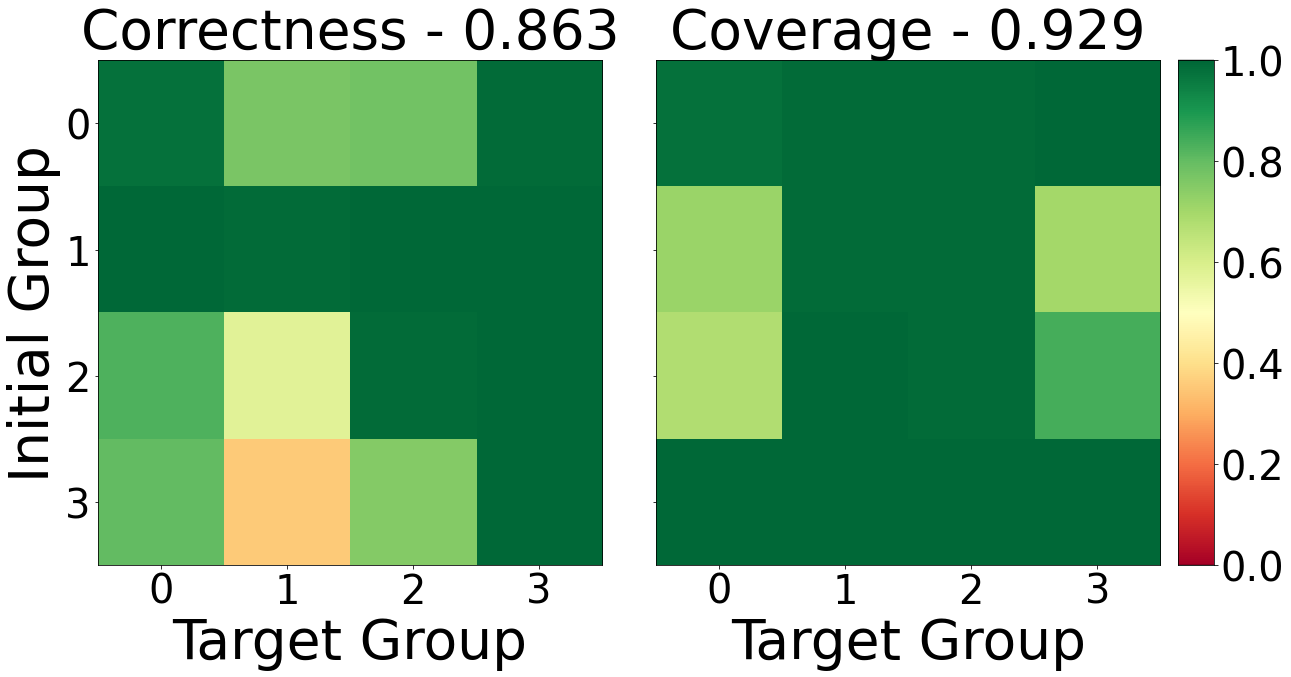

In [14]:
# Evaluate the explanations
deltas = np.load("deltas.npy")

a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas), epsilon)

plot_metrics(a, b, name = "synth-metrics-ours.png")

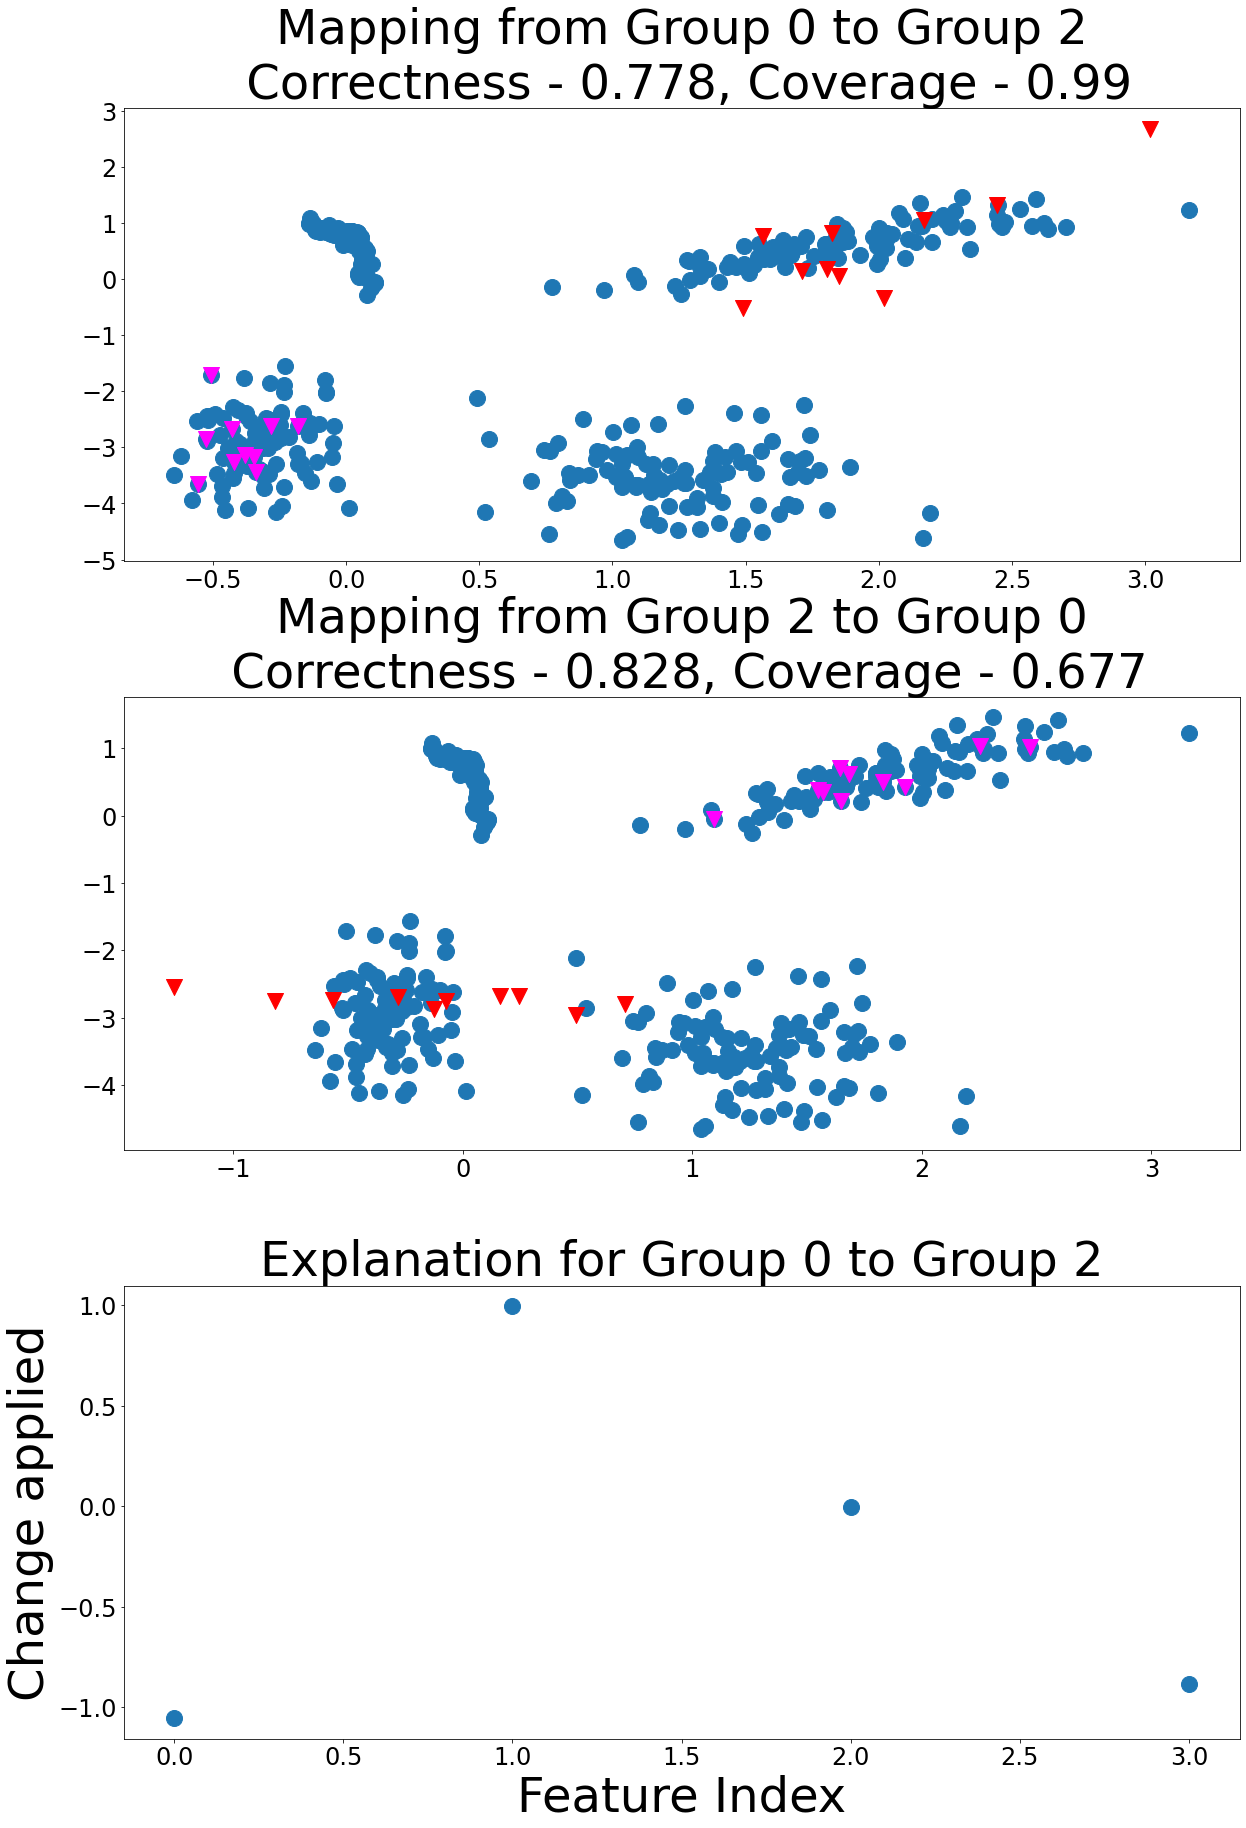

In [15]:
plot_explanation(model, x, rep, indices, deltas, a, b, 0, 2, num_points = 10, name = "tst_synthetic.png")